In [1]:
import pandas as pd
import numpy as np
%pylab inline
plt.style.use('seaborn-dark')
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

In [ ]:
def plot_2d_separator(classifier, X, fill=False, twocolor=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1001)
    yy = np.linspace(y_min, y_max, 1001)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        try:
            decision_values = classifier.predict_proba(X_grid)[:, 1]
        except:
            decision_values = classifier.predict(X_grid)
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        c = decision_values.reshape(X1.shape)
        if twocolor:
            print (fill_levels)
            ax.contourf(X1, X2, c,
                        levels=fill_levels, colors=['#FF9999', '#0000FF'], alpha=0.2)
            ax.contour(X1, X2, c,
                       levels=np.linspace(c.min(), c.max(), 15), alpha=0.5, colors="white")             
            
        else:
            ax.contourf(X1, X2, c,
                        levels=np.linspace(c.min(), c.max(), 30), cmap=plt.cm.binary, alpha=0.5)
#         ax.contour(X1, X2, c,
#                     levels=np.linspace(c.min(), c.max(), 30), alpha=0.5, colors="white")        

    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

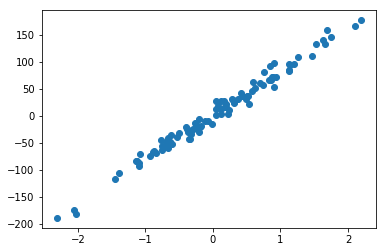

In [11]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1,
                       n_informative=1, n_targets=1,
                       bias=0.0, effective_rank=None,
                       tail_strength=800, noise=10,
                       shuffle=True, coef=False, random_state=1)
plt.scatter(X, y)
plt.show()